# Exercise 1: Data Exploration and Preprocessing

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


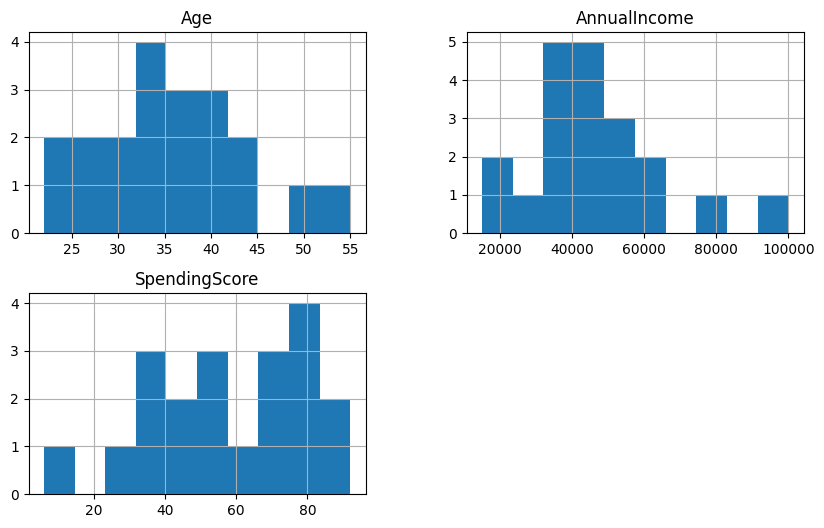

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/customer_segmentation.csv')

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data exploration - Histograms for Age, Annual Income, and Spending Score
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()

# Data Normalization using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

# Exercise 2: Implementing K-Means Clustering


In [3]:
from sklearn.cluster import KMeans

# Initial model implementation with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Elbow Method to determine the optimal k
inertia = []
k_values = range(1, 6)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

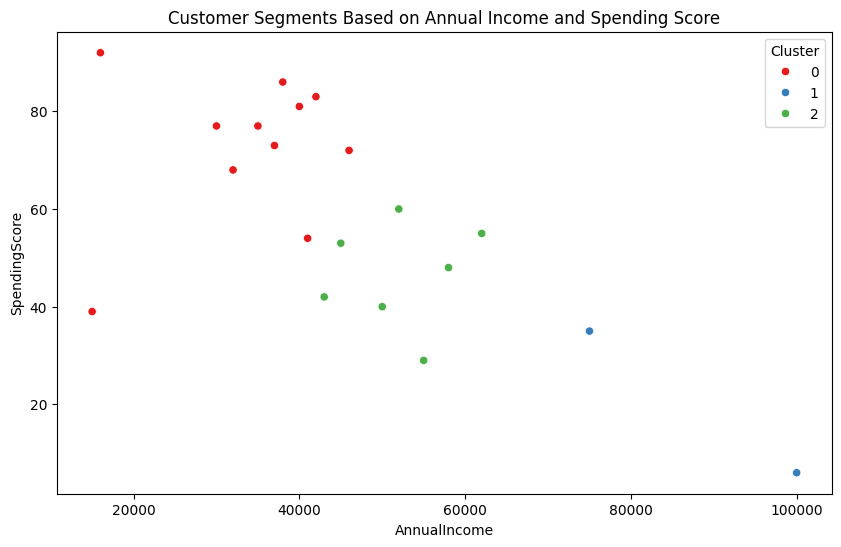

In [4]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

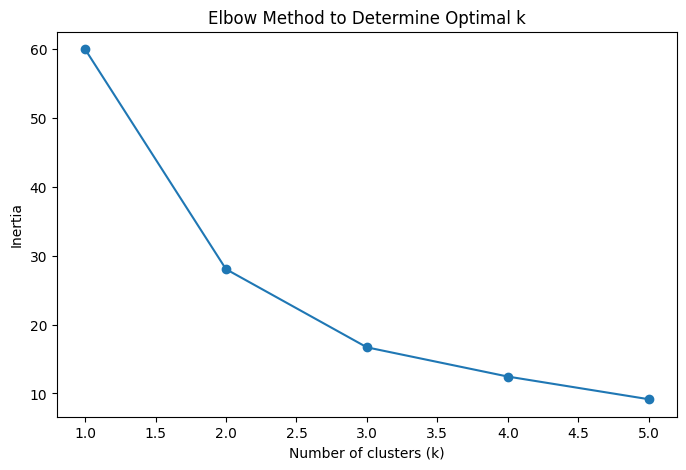

In [5]:
# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Exercise 3: Model Evaluation


For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.319
For k=5, the silhouette score is 0.339


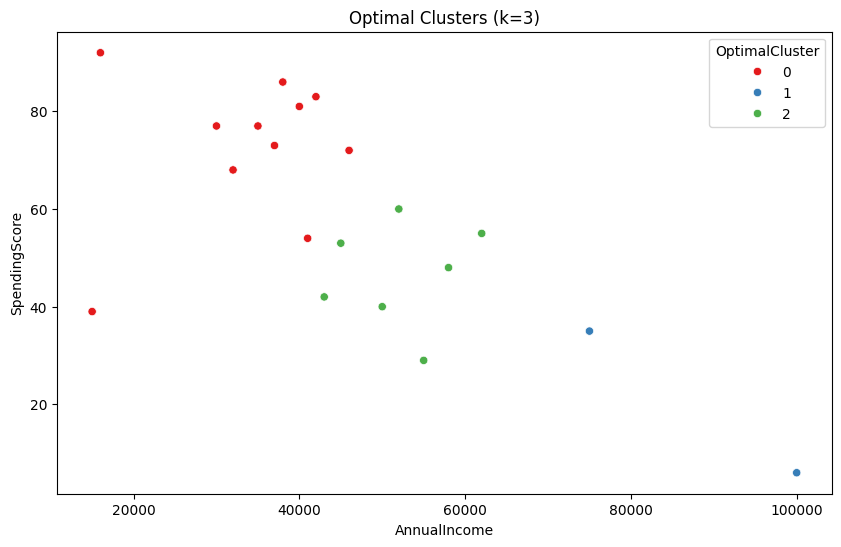

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0


In [6]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
for k in range(2, 6):
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(df_scaled)
  silhouette_avg = silhouette_score(df_scaled, clusters)
  print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Set1')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()

# Cluster analysis by averaging the features for each cluster
cluster_summary = df.groupby('OptimalCluster').mean()
print(cluster_summary)

# Exercise 4: Interpretation and Reporting

**1. Cluster Interpretation**

The K-means clustering analysis identified three customer segments:

**Cluster 0**: High-Income, Low-Spending Customers
- Customers with high annual income but low spending
scores. They are selective in purchases.

**Cluster 1**: Mid-Income, Moderate-Spending Customers
- Customers with moderate income and spending behavior, reflecting typical consumer habits.

**Cluster 2**: Young, High-Spending Customers
- Younger customers who spend significantly, often on lifestyle products.

**2. Report Summary**

**Data Exploration**:
- Loaded the dataset and checked for missing values.
- Visualized distributions of Age, Annual Income, and Spending Score.
- Normalized data using StandardScaler.

**K-means Clustering Results**:
- Implemented K-means with k=3, determined optimal through the Elbow Method and silhouette scores.

**Cluster Characteristics**:

| Cluster | Avg. Age | Avg. Income  | Avg. Spending Score |
|---------|----------|--------------|---------------------|
| 0       | 30.09    | 33,818.18    | 72.91               |
| 1       | 52.50    | 87,500.00    | 20.50               |
| 2       | 40.00    | 52,142.86    | 46.71               |


**Insights**:
- Tailored marketing strategies for each cluster can enhance engagement and spending.
- Understand consumer behavior for better inventory and promotional planning.

**3. Visualizations**

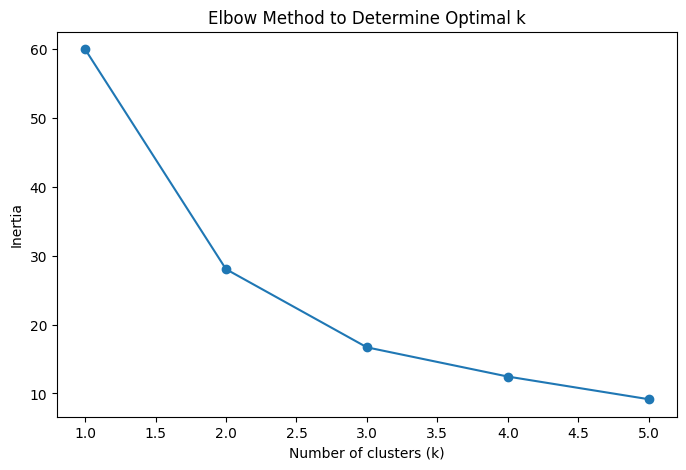

In [7]:
#1. Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.319
For k=5, the silhouette score is 0.339


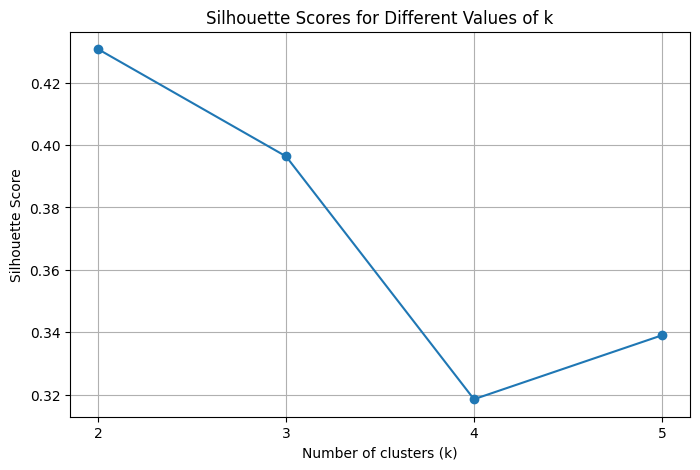

In [8]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_values = []  # Initialize a list to store silhouette scores

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    silhouette_values.append(silhouette_avg)  # Append the score to the list
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_values, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 6))
plt.grid()
plt.show()

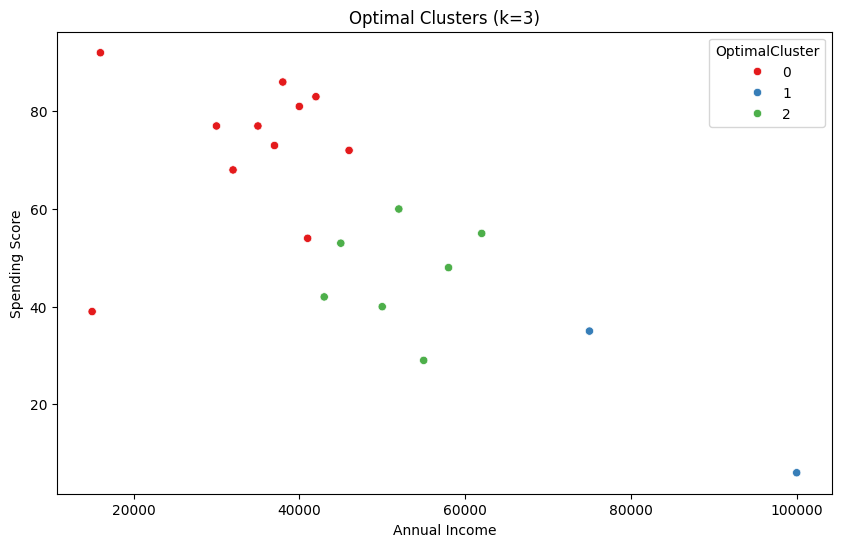

In [9]:
#3. Cluster Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Set1')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()